### Import essential packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Import DataFrame

In [81]:
df = pd.read_csv(r"C:\Users\Dell\Downloads\BigML_Dataset.csv",encoding='latin')
df.head()

,url,title,author,price,save,pages,description,size,publisher,language,text_to_speech,x_ray,lending,customer_reviews,stars
0,http://www.amazon.com/How-Bartender-Bartending...,How to be a Bartender: Get a Bartending Job Wi...,Dave Allred,9.99,NaN,171.0,"In his revolutionary new book, Dave Allred (Th...",249.0,NaN,English,Enabled,Not Enabled,Enabled,23.0,4.9
1,http://www.amazon.com/Raise-Bar-Action-Based-C...,Raise the Bar: An Action-Based Method for Maxi...,Jon Taffer,2.00,24.00,258.0,If thereâs anyone who can prevent a bar or r...,1427.0,Amazon Publishing,English,Enabled,Enabled,Enabled,80.0,4.7
2,http://www.amazon.com/The-Professional-Bartend...,The Professional Bartender's Handbook: A Recip...,Valerie Mellema,9.87,12.08,288.0,The Professional Bartenders Handbook is writte...,5643.0,Atlantic Publishing Group Inc.; illustrated ed...,English,Enabled,Not Enabled,Not Enabled,32.0,4.2
3,http://www.amazon.com/Double-Your-Tips-Jerry-M...,How to Double Your Tips [Kindle Edition],Jerry Minchey,2.99,NaN,36.0,"How to Double Your Tips (For every waitress, w...",98.0,Stony River Media,English,Enabled,Not Enabled,Enabled,6.0,4.5
4,http://www.amazon.com/The-Bartenders-Bible-Mix...,The Bartender's Bible: 1001 Mixed Drinks [Kind...,Gary Regan,5.99,2.00,400.0,Mix Drinks Like A Pro Now you can with this in...,647.0,HarperCollins e-books,English,Enabled,Not Enabled,Not Enabled,59.0,3.6


## Understanding how data is distributed

In [82]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,48642.0,8.242983,12.867139,0.00,2.99,6.6,9.99,1200.00
save,36290.0,8.938648,9.737481,0.01,4.96,7.0,11.00,269.46
pages,48987.0,293.684284,285.217646,1.00,163.00,268.0,360.00,10221.00
size,48155.0,2470.728624,12379.529979,1.00,427.00,749.0,1812.00,618307.00
customer_reviews,47751.0,94.231828,319.180387,1.00,11.00,29.0,78.00,19723.00
stars,47752.0,4.281297,0.507142,1.00,4.00,4.4,4.60,5.00


### Drop useless columns for the first model

In [83]:
df.drop(['url','save','publisher','description','title','author','language'], axis='columns', inplace=True)
df.head()

,price,pages,size,text_to_speech,x_ray,lending,customer_reviews,stars
0,9.99,171.0,249.0,Enabled,Not Enabled,Enabled,23.0,4.9
1,2.00,258.0,1427.0,Enabled,Enabled,Enabled,80.0,4.7
2,9.87,288.0,5643.0,Enabled,Not Enabled,Not Enabled,32.0,4.2
3,2.99,36.0,98.0,Enabled,Not Enabled,Enabled,6.0,4.5
4,5.99,400.0,647.0,Enabled,Not Enabled,Not Enabled,59.0,3.6


### Generating the Target variable to segregate good (stars=5) and bad (stars<5) books

In [84]:
df['Target'] = df['stars'].apply(lambda x: 1 if x==5 else 0)
df.head()

,price,pages,size,text_to_speech,x_ray,lending,customer_reviews,stars,Target
0,9.99,171.0,249.0,Enabled,Not Enabled,Enabled,23.0,4.9,0
1,2.00,258.0,1427.0,Enabled,Enabled,Enabled,80.0,4.7,0
2,9.87,288.0,5643.0,Enabled,Not Enabled,Not Enabled,32.0,4.2,0
3,2.99,36.0,98.0,Enabled,Not Enabled,Enabled,6.0,4.5,0
4,5.99,400.0,647.0,Enabled,Not Enabled,Not Enabled,59.0,3.6,0


### Generating dummies for the device-related columns

In [85]:
df = pd.get_dummies(df)
df.head()

,price,pages,size,customer_reviews,stars,Target,text_to_speech_Enabled,text_to_speech_Not enabled,x_ray_Enabled,x_ray_Not Enabled,lending_Enabled,lending_Not Enabled
0,9.99,171.0,249.0,23.0,4.9,0,1,0,0,1,1,0
1,2.00,258.0,1427.0,80.0,4.7,0,1,0,1,0,1,0
2,9.87,288.0,5643.0,32.0,4.2,0,1,0,0,1,0,1
3,2.99,36.0,98.0,6.0,4.5,0,1,0,0,1,1,0
4,5.99,400.0,647.0,59.0,3.6,0,1,0,0,1,0,1


In [86]:
df.drop(['text_to_speech_Not enabled','x_ray_Not Enabled','lending_Not Enabled'], axis='columns', inplace=True)
df.head()

,price,pages,size,customer_reviews,stars,Target,text_to_speech_Enabled,x_ray_Enabled,lending_Enabled
0,9.99,171.0,249.0,23.0,4.9,0,1,0,1
1,2.00,258.0,1427.0,80.0,4.7,0,1,1,1
2,9.87,288.0,5643.0,32.0,4.2,0,1,0,0
3,2.99,36.0,98.0,6.0,4.5,0,1,0,1
4,5.99,400.0,647.0,59.0,3.6,0,1,0,0


## Getting infos about the missing data

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49197 entries, 0 to 49196
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   price                   48642 non-null  float64
 1   pages                   48987 non-null  float64
 2   size                    48155 non-null  float64
 3   customer_reviews        47751 non-null  float64
 4   stars                   47752 non-null  float64
 5   Target                  49197 non-null  int64  
 6   text_to_speech_Enabled  49197 non-null  uint8  
 7   x_ray_Enabled           49197 non-null  uint8  
 8   lending_Enabled         49197 non-null  uint8  
dtypes: float64(5), int64(1), uint8(3)
memory usage: 2.4 MB


### Learning the relationship between the Target variable and the numerical data

<AxesSubplot:xlabel='price', ylabel='Count'>

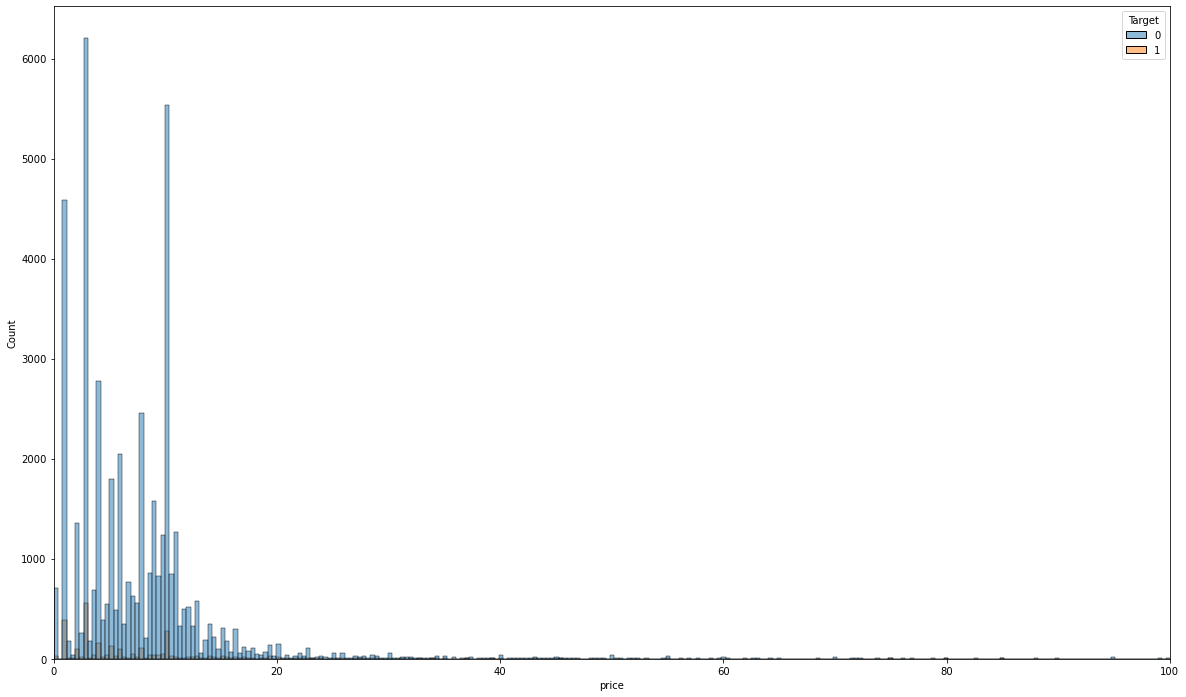

In [104]:
plt.figure(figsize=(20, 12))
plt.xlim(0, 100)
sns.histplot(df,x='price',hue='Target')

<AxesSubplot:xlabel='pages', ylabel='Count'>

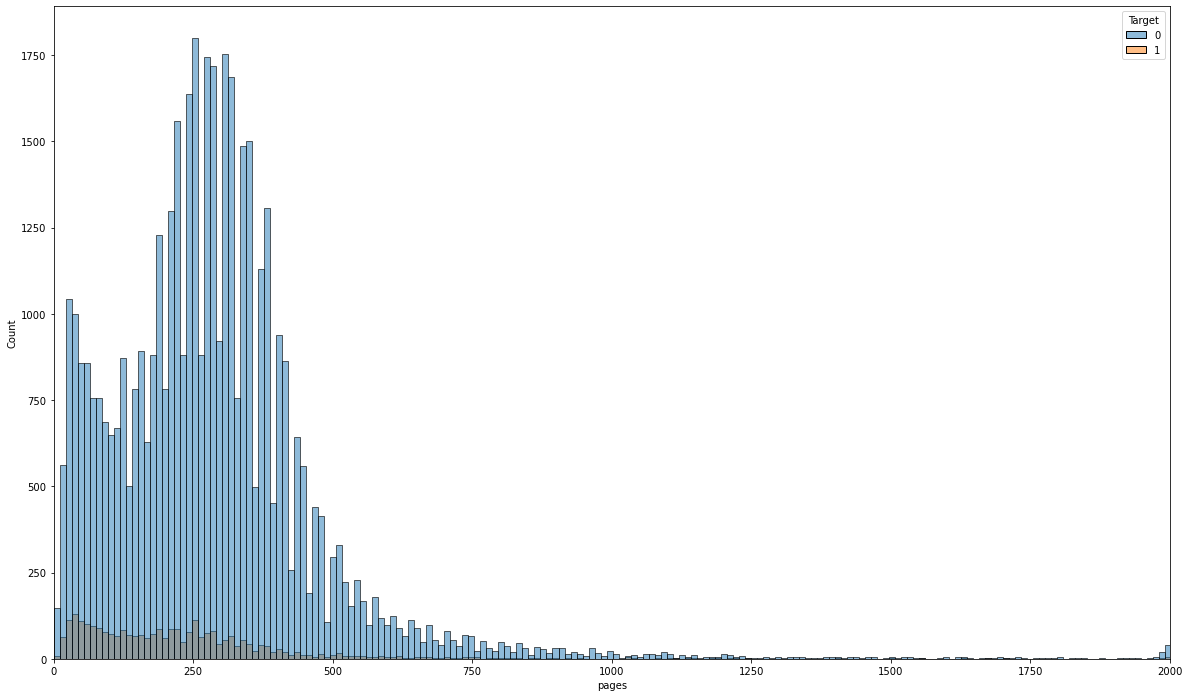

In [110]:
plt.figure(figsize=(20, 12))
plt.xlim(0, 2000)
sns.histplot(df,x='pages',hue='Target')

<AxesSubplot:xlabel='size', ylabel='Count'>

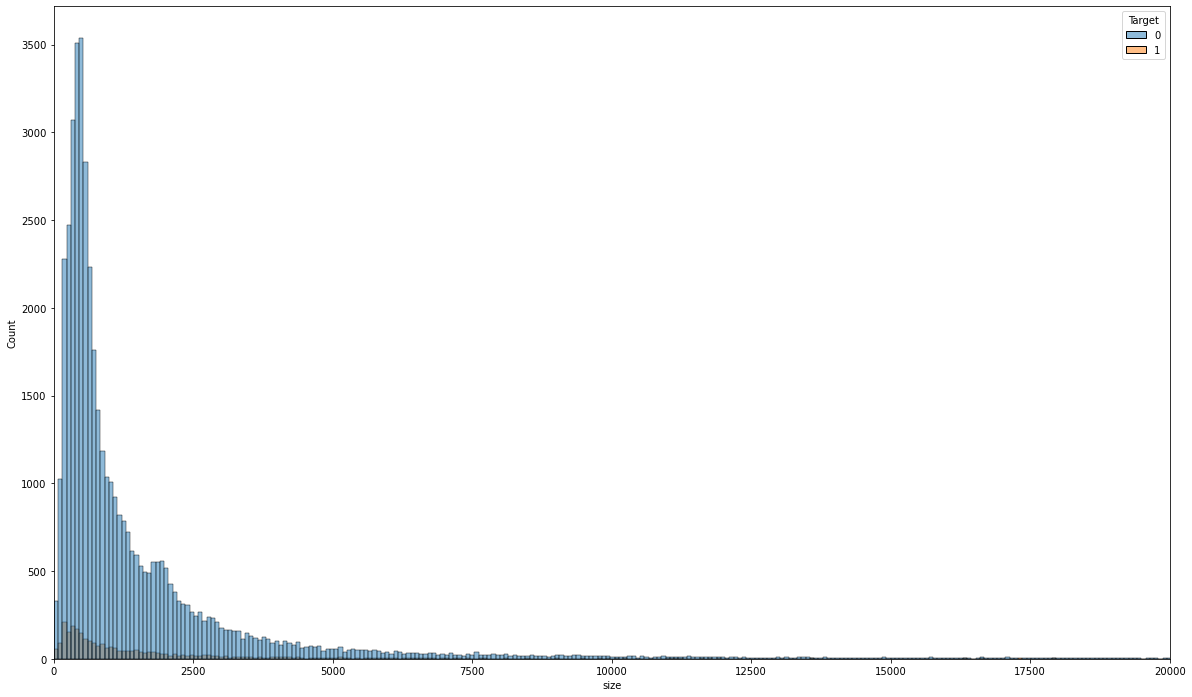

In [111]:
plt.figure(figsize=(20, 12))
plt.xlim(0, 20000)
sns.histplot(df,x='size',hue='Target')

<AxesSubplot:xlabel='customer_reviews', ylabel='Count'>

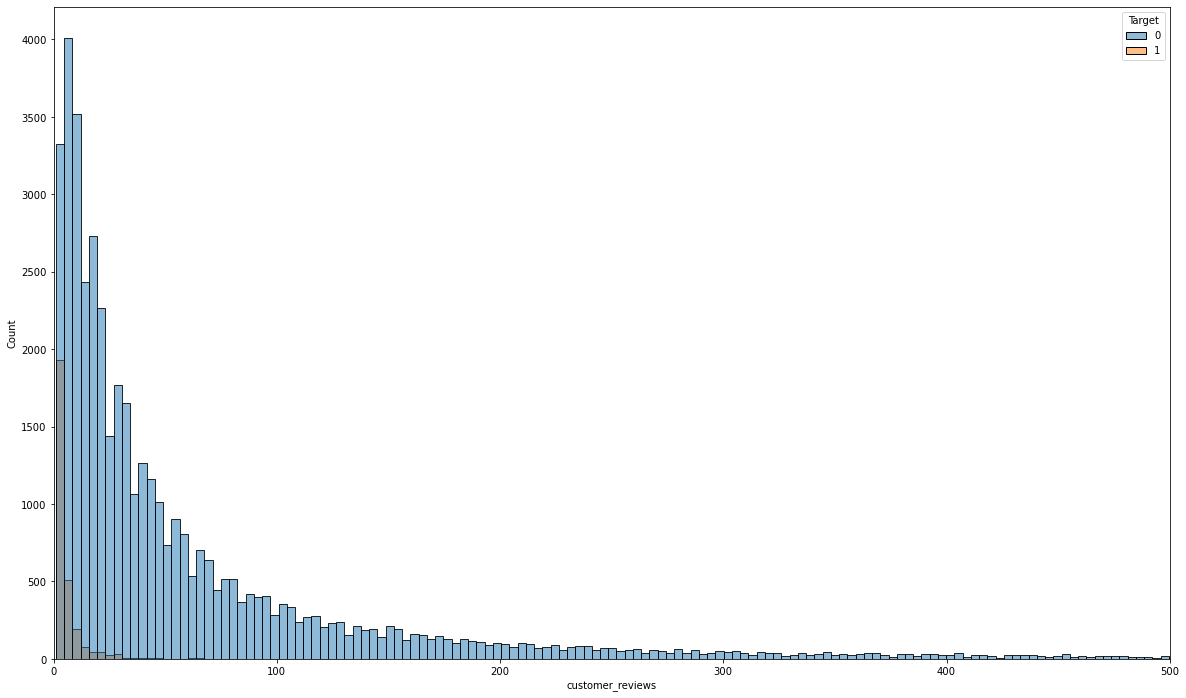

In [112]:
plt.figure(figsize=(20, 12))
plt.xlim(0, 500)
sns.histplot(df,x='customer_reviews',hue='Target')

<AxesSubplot:xlabel='stars', ylabel='Count'>

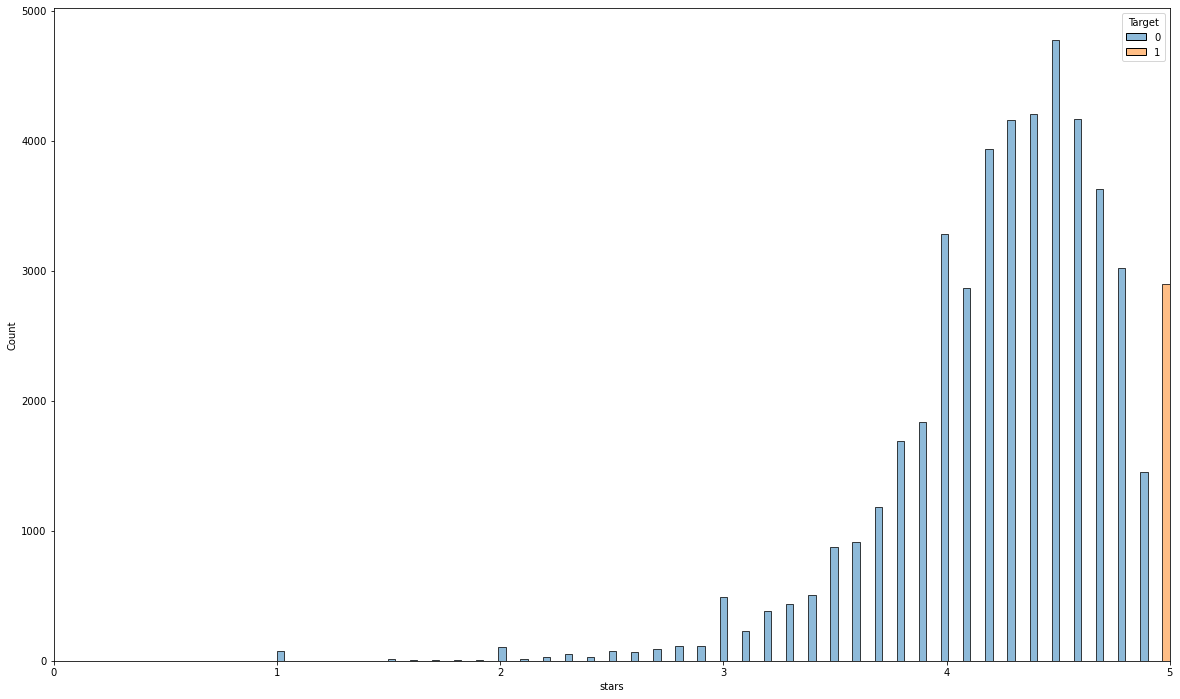

In [107]:
plt.figure(figsize=(20, 12))
plt.xlim(0, 5)
sns.histplot(df,x='stars',hue='Target')

### Generating histograms

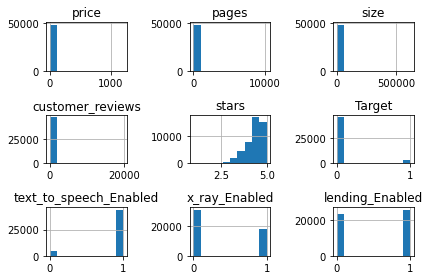

In [10]:
df.hist()
plt.tight_layout()
plt.show()

### Correlation Matrix

<AxesSubplot:>

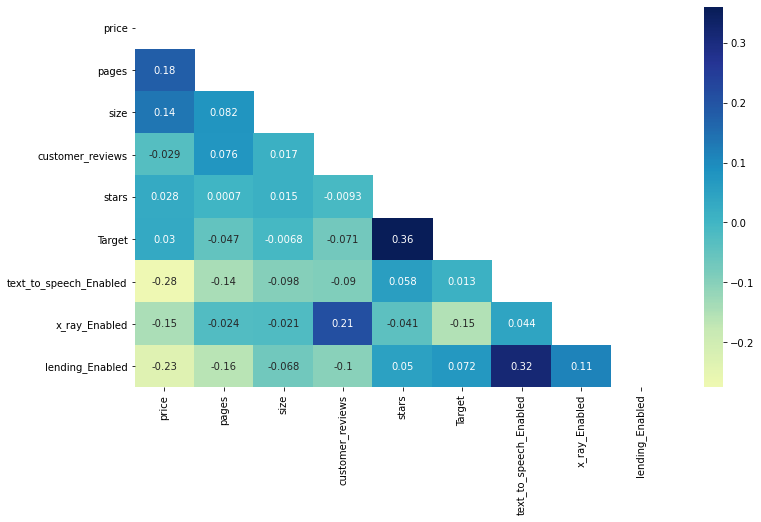

In [15]:
corr=df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(12,7))
sns.heatmap(corr, mask = mask, annot=True, center=0, cmap="YlGnBu")

### Training my data set

In [16]:
train,test = train_test_split(df, test_size=0.2,stratify = df['Target'])
X_cols = ['price', 'pages', 'size', 'customer_reviews', 'text_to_speech_Enabled', 'x_ray_Enabled', 'lending_Enabled']
X_train, X_test = train[X_cols], test[X_cols]
y_train, y_test = train['Target'], test['Target']
num_cols = ['price', 'pages', 'size', 'customer_reviews']
train_median = X_train[num_cols].median()
X_train[num_cols]=X_train[num_cols].fillna(train_median)
X_test[num_cols]=X_test[num_cols].fillna(train_median)

### I chose some models. Let's see how they perform

In [17]:
regs = [RandomForestClassifier(),GaussianNB(),LogisticRegression(),DecisionTreeClassifier()]
for reg in regs:
    print("Regressão: ", reg.__class__.__name__)
    reg = reg
    reg.fit(X_train, y_train)
    print("Score: ", reg.score(X_test, y_test))
    y_proba_test = reg.predict_proba(X_test)
    roc_test = roc_auc_score(y_test, y_proba_test[:, 1])
    print("ROC AUC: ", roc_test)
    print("="*80)

Regressão:  RandomForestClassifier
Score:  0.9436991869918699
ROC AUC:  0.8901605906010277
Regressão:  GaussianNB
Score:  0.6911585365853659
ROC AUC:  0.8587691777761228
Regressão:  LogisticRegression
Score:  0.9410569105691057
ROC AUC:  0.9150090303120577
Regressão:  DecisionTreeClassifier
Score:  0.9158536585365854
ROC AUC:  0.6369243874283161


### Classifying the columns according to their importance for the model

In [18]:
reg = DecisionTreeClassifier()
reg.fit(X_train, y_train)
clf=pd.DataFrame(list(zip(X_train.columns, reg.feature_importances_)), columns=['atribute', 'importance'])
clf.sort_values('importance', ascending=False).head()

,atribute,importance
2,size,0.297910
3,customer_reviews,0.295377
1,pages,0.243206
0,price,0.136228
6,lending_Enabled,0.013006


In [19]:
reg = RandomForestClassifier()
reg.fit(X_train, y_train)
clf=pd.DataFrame(list(zip(X_train.columns, reg.feature_importances_)), columns=['atribute', 'importance'])
clf.sort_values('importance', ascending=False).head()

,atribute,importance
3,customer_reviews,0.303078
2,size,0.266185
1,pages,0.249580
0,price,0.151558
5,x_ray_Enabled,0.015025


### Decision Tree

ROC AUC de Teste é DecisionTreeClassifier é 85.81%


[Text(558.0, 453.0, 'customer_reviews <= 3.5\ngini = 0.111\nsamples = 39357\nvalue = [37036, 2321]'),
 Text(279.0, 271.8, 'customer_reviews <= 1.5\ngini = 0.486\nsamples = 3278\nvalue = [1916, 1362]'),
 Text(139.5, 90.59999999999997, 'gini = 0.486\nsamples = 1099\nvalue = [459, 640]'),
 Text(418.5, 90.59999999999997, 'gini = 0.443\nsamples = 2179\nvalue = [1457, 722]'),
 Text(837.0, 271.8, 'customer_reviews <= 8.5\ngini = 0.052\nsamples = 36079\nvalue = [35120, 959]'),
 Text(697.5, 90.59999999999997, 'gini = 0.231\nsamples = 4561\nvalue = [3954, 607]'),
 Text(976.5, 90.59999999999997, 'gini = 0.022\nsamples = 31518\nvalue = [31166, 352]')]

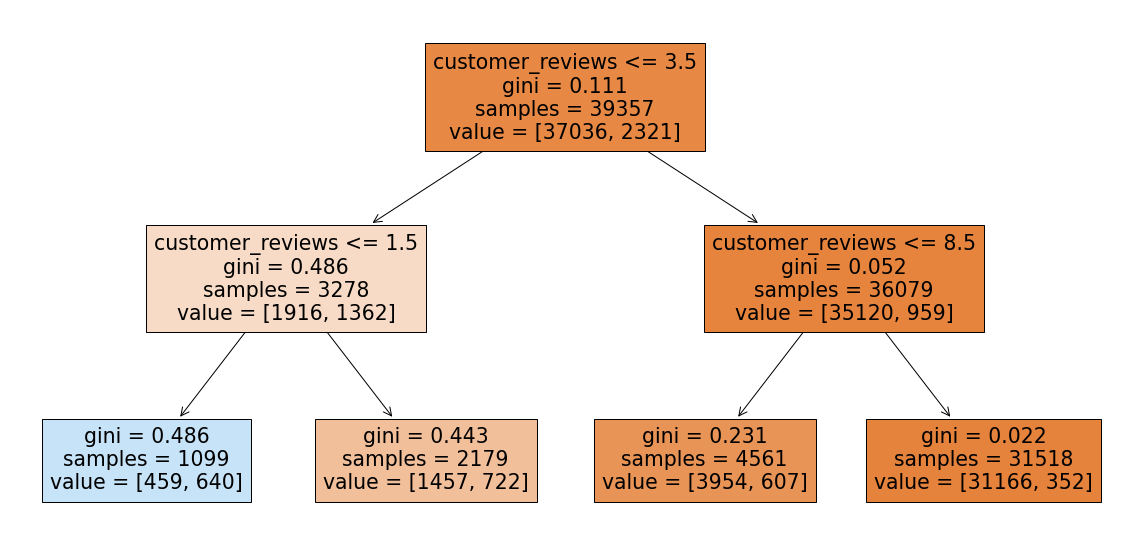

In [20]:
from sklearn import tree
clf = DecisionTreeClassifier(max_depth=2)
clf.fit(X_train, y_train) 
y_proba = clf.predict_proba(X_test)
roc_auc=roc_auc_score(y_test, y_proba[:, 1])

print(f'ROC AUC de Teste é {clf.__class__.__name__} é {roc_auc*100:.2f}%')

plt.figure(figsize=(20,10))
tree.plot_tree(clf,feature_names=X_train.columns,filled=True)

### Confusion matrix for different models

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      9260
           1       0.53      0.24      0.33       580

    accuracy                           0.94      9840
   macro avg       0.74      0.61      0.65      9840
weighted avg       0.93      0.94      0.93      9840



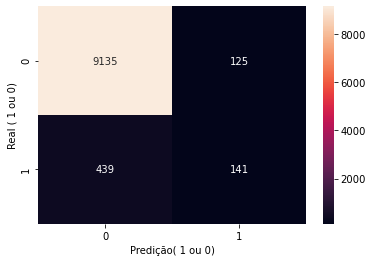

In [21]:
reg = RandomForestClassifier()
reg.fit(X_train, y_train)
y_pred=reg.predict(X_test)
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predição( 1 ou 0)')
plt.ylabel('Real ( 1 ou 0)')
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.68      0.80      9260
           1       0.15      0.94      0.26       580

    accuracy                           0.69      9840
   macro avg       0.57      0.81      0.53      9840
weighted avg       0.94      0.69      0.77      9840



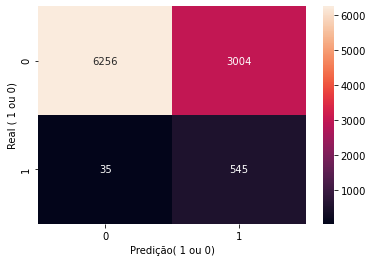

In [22]:
reg = GaussianNB()
reg.fit(X_train, y_train)
y_pred=reg.predict(X_test)
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predição( 1 ou 0)')
plt.ylabel('Real ( 1 ou 0)')
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      9260
           1       0.00      0.00      0.00       580

    accuracy                           0.94      9840
   macro avg       0.47      0.50      0.48      9840
weighted avg       0.89      0.94      0.91      9840



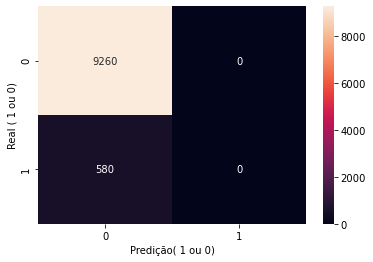

In [24]:
reg = LogisticRegression()
reg.fit(X_train, y_train)
y_pred=reg.predict(X_test)
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predição( 1 ou 0)')
plt.ylabel('Real ( 1 ou 0)')
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96      9260
           1       0.30      0.33      0.31       580

    accuracy                           0.92      9840
   macro avg       0.63      0.64      0.63      9840
weighted avg       0.92      0.92      0.92      9840



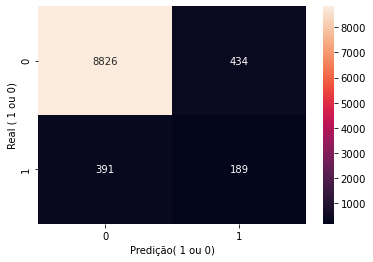

In [25]:
reg = DecisionTreeClassifier()
reg.fit(X_train, y_train)
y_pred=reg.predict(X_test)
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predição( 1 ou 0)')
plt.ylabel('Real ( 1 ou 0)')
print(classification_report(y_test, y_pred))

In [ ]:
=================================================================================================================================

### Reloading and adapting original data

In [26]:
df = pd.read_csv(r"C:\Users\Dell\Downloads\BigML_Dataset.csv",encoding='latin')
df['Target'] = df['stars'].apply(lambda x: 1 if x==5 else 0)
df.drop(['url','save','publisher','description','title','author','language'], axis='columns', inplace=True)
df = pd.get_dummies(df)
df.drop(['text_to_speech_Not enabled','x_ray_Not Enabled','lending_Not Enabled'], axis='columns', inplace=True)
df=df.replace([np.inf,-np.inf], np.nan)
df.head()

,price,pages,size,customer_reviews,stars,Target,text_to_speech_Enabled,x_ray_Enabled,lending_Enabled
0,9.99,171.0,249.0,23.0,4.9,0,1,0,1
1,2.00,258.0,1427.0,80.0,4.7,0,1,1,1
2,9.87,288.0,5643.0,32.0,4.2,0,1,0,0
3,2.99,36.0,98.0,6.0,4.5,0,1,0,1
4,5.99,400.0,647.0,59.0,3.6,0,1,0,0


### Filling the NANs with the median

In [27]:
num_cols = ['price', 'pages', 'size', 'customer_reviews','stars']
median = df[num_cols].median()
df[num_cols]=df[num_cols].fillna(median)

## Trying to work with text data. Column 'description' of my data frame
### Selecting the best n_components for the TSVD
### Source: https://chrisalbon.com/machine_learning/feature_engineering/select_best_number_of_components_in_tsvd/

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix
X = StandardScaler().fit_transform(df)
X_sparse = csr_matrix(X)
tsvd = TruncatedSVD(n_components=X_sparse.shape[1]-1)
X_tsvd = tsvd.fit(X)
tsvd_var_ratios = tsvd.explained_variance_ratio_

In [29]:
#Create a function to select the best n_components for the TSVD
#Source: https://chrisalbon.com/machine_learning/feature_engineering/select_best_number_of_components_in_tsvd/
def select_n_components(var_ratio, goal_var: float) -> int:
    # Set initial variance explained so far
    total_variance = 0.0
    
    # Set initial number of features
    n_components = 0
    
    # For the explained variance of each feature:
    for explained_variance in var_ratio:
        
        # Add the explained variance to the total
        total_variance += explained_variance
        
        # Add one to the number of components
        n_components += 1
        
        # If we reach our goal level of explained variance
        if total_variance >= goal_var:
            # End the loop
            break
            
    # Return the number of components
    return n_components

#runnig the function with my own data 
#goal level of explained variance = 95%
select_n_components(tsvd_var_ratios, 0.95)

8

### Reloading original data
### Fitting a SVD + TFIDF model with the best n_components

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
df = pd.read_csv(r"C:\Users\Dell\Downloads\BigML_Dataset.csv",encoding='latin')
vectorizer = TfidfVectorizer(min_df=1,stop_words='english')
words = vectorizer.fit_transform(df['description'])
svd = TruncatedSVD(n_components = select_n_components(tsvd_var_ratios, 0.95))
lsa = svd.fit_transform(words)

### Undestanding a sample of words

In [31]:
dictionary = vectorizer.get_feature_names()
dictionary[:5]

['00', '000', '00000', '0000000', '0000001010011010â']

### Generating the encoding matrix and filtering some no-sense characters

In [32]:
encoding_matrix = pd.DataFrame(svd.components_,index=['Topic 1','Topic 2','Topic 3','Topic 4','Topic 5','Topic 6','Topic 7','Topic 8']).T
encoding_matrix["terms"] = dictionary
for i in [1,2,3,4,5,6,7,8]:
    encoding_matrix[f'abs_topic_{i}'] = np.abs(encoding_matrix[f'Topic {i}'])
for i in ['0','1','2','3','4','5','6','7','8','9','è','ä','é','ã','ç','â','æ','ï','å','book','amazon','kindle']:
    encoding_matrix = encoding_matrix[~encoding_matrix.terms.str.contains(i)]
encoding_matrix.sort_values('abs_topic_1',ascending=False)

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,terms,abs_topic_1,abs_topic_2,abs_topic_3,abs_topic_4,abs_topic_5,abs_topic_6,abs_topic_7,abs_topic_8
71891,1.804271e-01,-8.749546e-02,1.422143e-02,-3.427644e-02,3.318692e-02,0.149407,-0.221249,-0.168047,life,1.804271e-01,8.749546e-02,1.422143e-02,3.427644e-02,3.318692e-02,0.149407,0.221249,0.168047
84869,1.558427e-01,-3.998188e-02,3.626423e-02,1.241835e-02,-9.518489e-02,-0.038290,0.148007,0.008923,new,1.558427e-01,3.998188e-02,3.626423e-02,1.241835e-02,9.518489e-02,0.038290,0.148007,0.008923
135511,1.126011e-01,-3.824996e-02,1.484712e-02,1.466937e-04,-9.398390e-02,0.049503,0.085634,-0.079704,world,1.126011e-01,3.824996e-02,1.484712e-02,1.466937e-04,9.398390e-02,0.049503,0.085634,0.079704
123651,1.105179e-01,-1.224013e-02,-1.463014e-02,-8.261001e-03,4.031355e-02,-0.028616,-0.019127,0.010737,time,1.105179e-01,1.224013e-02,1.463014e-02,8.261001e-03,4.031355e-02,0.028616,0.019127,0.010737
73621,1.093909e-01,-1.331945e-01,8.569392e-02,-1.629127e-02,8.627036e-02,0.001800,-0.133391,0.047733,love,1.093909e-01,1.331945e-01,8.569392e-02,1.629127e-02,8.627036e-02,0.001800,0.133391,0.047733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61439,2.108885e-07,-7.337824e-07,8.349042e-07,1.092056e-07,2.273595e-07,-0.000002,0.000001,0.000004,incredibile,2.108885e-07,7.337824e-07,8.349042e-07,1.092056e-07,2.273595e-07,0.000002,0.000001,0.000004
70167,2.108885e-07,-7.337824e-07,8.349042e-07,1.092056e-07,2.273595e-07,-0.000002,0.000001,0.000004,lasciarsi,2.108885e-07,7.337824e-07,8.349042e-07,1.092056e-07,2.273595e-07,0.000002,0.000001,0.000004
98868,2.108885e-07,-7.337824e-07,8.349042e-07,1.092056e-07,2.273595e-07,-0.000002,0.000001,0.000004,quando,2.108885e-07,7.337824e-07,8.349042e-07,1.092056e-07,2.273595e-07,0.000002,0.000001,0.000004
108441,2.108885e-07,-7.337824e-07,8.349042e-07,1.092056e-07,2.273595e-07,-0.000002,0.000001,0.000004,scoprire,2.108885e-07,7.337824e-07,8.349042e-07,1.092056e-07,2.273595e-07,0.000002,0.000001,0.000004


### Merging the top encoded df with my main df

In [33]:
df = pd.read_csv(r"C:\Users\Dell\Downloads\BigML_Dataset.csv",encoding='latin')
top_encoded_df = pd.DataFrame(lsa,columns = ['abs_topic_1','abs_topic_2','abs_topic_3','abs_topic_4','abs_topic_5','abs_topic_6','abs_topic_7','abs_topic_8'])
top_encoded_df['description']=df['description']
df['abs_topic_1']=top_encoded_df['abs_topic_1']
df['abs_topic_2']=top_encoded_df['abs_topic_2']
df['abs_topic_3']=top_encoded_df['abs_topic_3']
df['abs_topic_4']=top_encoded_df['abs_topic_4']
df['abs_topic_5']=top_encoded_df['abs_topic_5']
df['abs_topic_6']=top_encoded_df['abs_topic_6']
df['abs_topic_7']=top_encoded_df['abs_topic_7']
df['abs_topic_8']=top_encoded_df['abs_topic_8']
df.head()

,url,title,author,price,save,pages,description,size,publisher,language,...,customer_reviews,stars,abs_topic_1,abs_topic_2,abs_topic_3,abs_topic_4,abs_topic_5,abs_topic_6,abs_topic_7,abs_topic_8
0,http://www.amazon.com/How-Bartender-Bartending...,How to be a Bartender: Get a Bartending Job Wi...,Dave Allred,9.99,NaN,171.0,"In his revolutionary new book, Dave Allred (Th...",249.0,NaN,English,...,23.0,4.9,0.159588,0.062500,-0.070944,-0.003884,0.016212,-0.051104,-0.029460,0.034872
1,http://www.amazon.com/Raise-Bar-Action-Based-C...,Raise the Bar: An Action-Based Method for Maxi...,Jon Taffer,2.00,24.00,258.0,If thereâs anyone who can prevent a bar or r...,1427.0,Amazon Publishing,English,...,80.0,4.7,0.104866,0.050641,-0.050097,0.000461,-0.009988,-0.090850,-0.015816,-0.056624
2,http://www.amazon.com/The-Professional-Bartend...,The Professional Bartender's Handbook: A Recip...,Valerie Mellema,9.87,12.08,288.0,The Professional Bartenders Handbook is writte...,5643.0,Atlantic Publishing Group Inc.; illustrated ed...,English,...,32.0,4.2,0.188824,0.109490,-0.072756,0.025539,0.009796,-0.069543,0.050164,0.108859
3,http://www.amazon.com/Double-Your-Tips-Jerry-M...,How to Double Your Tips [Kindle Edition],Jerry Minchey,2.99,NaN,36.0,"How to Double Your Tips (For every waitress, w...",98.0,Stony River Media,English,...,6.0,4.5,0.109612,0.073879,-0.077477,-0.005698,0.038486,-0.035502,-0.028893,0.038010
4,http://www.amazon.com/The-Bartenders-Bible-Mix...,The Bartender's Bible: 1001 Mixed Drinks [Kind...,Gary Regan,5.99,2.00,400.0,Mix Drinks Like A Pro Now you can with this in...,647.0,HarperCollins e-books,English,...,59.0,3.6,0.073204,0.026183,-0.017504,0.006818,0.023443,0.012147,0.018851,0.037181


### Cleaning the columns and generating a new df with the two topics

In [34]:
df['Target'] = df['stars'].apply(lambda x: 1 if x==5 else 0)
df.drop(['url','save','publisher','description','title','author','language'], axis='columns', inplace=True)
df = pd.get_dummies(df)
df.drop(['text_to_speech_Not enabled','x_ray_Not Enabled','lending_Not Enabled'], axis='columns', inplace=True)
df.head()

,price,pages,size,customer_reviews,stars,abs_topic_1,abs_topic_2,abs_topic_3,abs_topic_4,abs_topic_5,abs_topic_6,abs_topic_7,abs_topic_8,Target,text_to_speech_Enabled,x_ray_Enabled,lending_Enabled
0,9.99,171.0,249.0,23.0,4.9,0.159588,0.062500,-0.070944,-0.003884,0.016212,-0.051104,-0.029460,0.034872,0,1,0,1
1,2.00,258.0,1427.0,80.0,4.7,0.104866,0.050641,-0.050097,0.000461,-0.009988,-0.090850,-0.015816,-0.056624,0,1,1,1
2,9.87,288.0,5643.0,32.0,4.2,0.188824,0.109490,-0.072756,0.025539,0.009796,-0.069543,0.050164,0.108859,0,1,0,0
3,2.99,36.0,98.0,6.0,4.5,0.109612,0.073879,-0.077477,-0.005698,0.038486,-0.035502,-0.028893,0.038010,0,1,0,1
4,5.99,400.0,647.0,59.0,3.6,0.073204,0.026183,-0.017504,0.006818,0.023443,0.012147,0.018851,0.037181,0,1,0,0


### New Correlation Matrix

<AxesSubplot:>

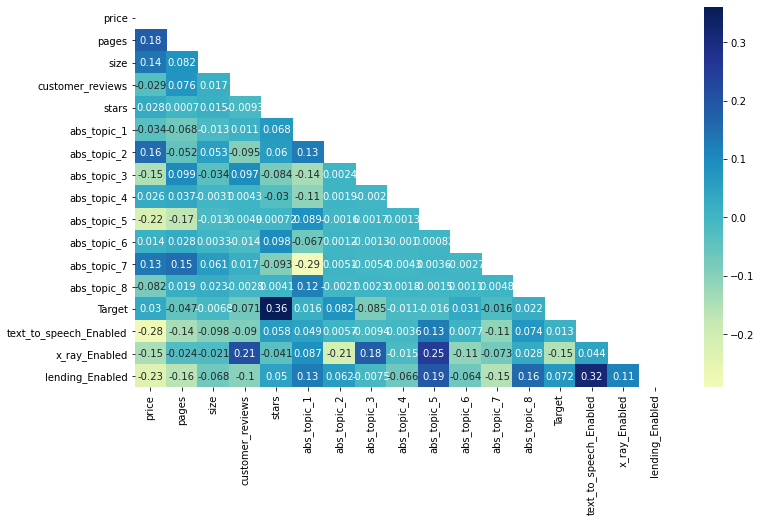

In [35]:
corr=df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(12,7))
sns.heatmap(corr, mask = mask, annot=True, center=0, cmap="YlGnBu")

### Training the data set

In [36]:
train,test = train_test_split(df, test_size=0.2,stratify = df['Target'])
X_cols = ['price', 'pages', 'size', 'customer_reviews', 'text_to_speech_Enabled', 'x_ray_Enabled', 'lending_Enabled','abs_topic_1','abs_topic_2','abs_topic_3','abs_topic_4','abs_topic_5','abs_topic_6','abs_topic_7','abs_topic_8']
X_train, X_test = train[X_cols], test[X_cols]
y_train, y_test = train['Target'], test['Target']
num_cols = ['price', 'pages', 'size', 'customer_reviews','abs_topic_1','abs_topic_2','abs_topic_3','abs_topic_4','abs_topic_5','abs_topic_6','abs_topic_7','abs_topic_8']
train_median = X_train[num_cols].median()
X_train[num_cols]=X_train[num_cols].fillna(train_median)
X_test[num_cols]=X_test[num_cols].fillna(train_median)

### Lets see if the performance of the models is better

In [37]:
regs = [RandomForestClassifier(),GaussianNB(),LogisticRegression(),DecisionTreeClassifier()]
for reg in regs:
    print("Regressão: ", reg.__class__.__name__)
    reg = reg
    reg.fit(X_train, y_train)
    print("Score: ", reg.score(X_test, y_test))
    y_proba_test = reg.predict_proba(X_test)
    roc_test = roc_auc_score(y_test, y_proba_test[:, 1])
    print("ROC AUC: ", roc_test)
    print("="*80)

Regressão:  RandomForestClassifier
Score:  0.9426829268292682
ROC AUC:  0.9116683734266777
Regressão:  GaussianNB
Score:  0.6902439024390243
ROC AUC:  0.8614985663215907
Regressão:  LogisticRegression
Score:  0.9409552845528455
ROC AUC:  0.9181574439562076
Regressão:  DecisionTreeClassifier
Score:  0.916869918699187
ROC AUC:  0.6608847843896626


### Classifying the columns according to their importance for the model

In [38]:
reg = DecisionTreeClassifier()
reg.fit(X_train, y_train)
clf=pd.DataFrame(list(zip(X_train.columns, reg.feature_importances_)), columns=['column', 'relevance'])
clf.sort_values('relevance', ascending=False).head()

,column,relevance
3,customer_reviews,0.278157
2,size,0.077521
7,abs_topic_1,0.075556
10,abs_topic_4,0.073502
1,pages,0.071305


In [39]:
reg = RandomForestClassifier()
reg.fit(X_train, y_train)
clf=pd.DataFrame(list(zip(X_train.columns, reg.feature_importances_)), columns=['column', 'relevance'])
clf.sort_values('relevance', ascending=False).head()

,column,relevance
3,customer_reviews,0.261649
2,size,0.069125
12,abs_topic_6,0.068307
8,abs_topic_2,0.068306
9,abs_topic_3,0.066566


### Decision Tree

ROC AUC de Teste é DecisionTreeClassifier é 86.48%


[Text(558.0, 453.0, 'customer_reviews <= 3.5\ngini = 0.111\nsamples = 39357\nvalue = [37036, 2321]'),
 Text(279.0, 271.8, 'customer_reviews <= 1.5\ngini = 0.488\nsamples = 3229\nvalue = [1868, 1361]'),
 Text(139.5, 90.59999999999997, 'gini = 0.483\nsamples = 1066\nvalue = [434, 632]'),
 Text(418.5, 90.59999999999997, 'gini = 0.447\nsamples = 2163\nvalue = [1434, 729]'),
 Text(837.0, 271.8, 'customer_reviews <= 7.5\ngini = 0.052\nsamples = 36128\nvalue = [35168, 960]'),
 Text(697.5, 90.59999999999997, 'gini = 0.24\nsamples = 3749\nvalue = [3227, 522]'),
 Text(976.5, 90.59999999999997, 'gini = 0.027\nsamples = 32379\nvalue = [31941, 438]')]

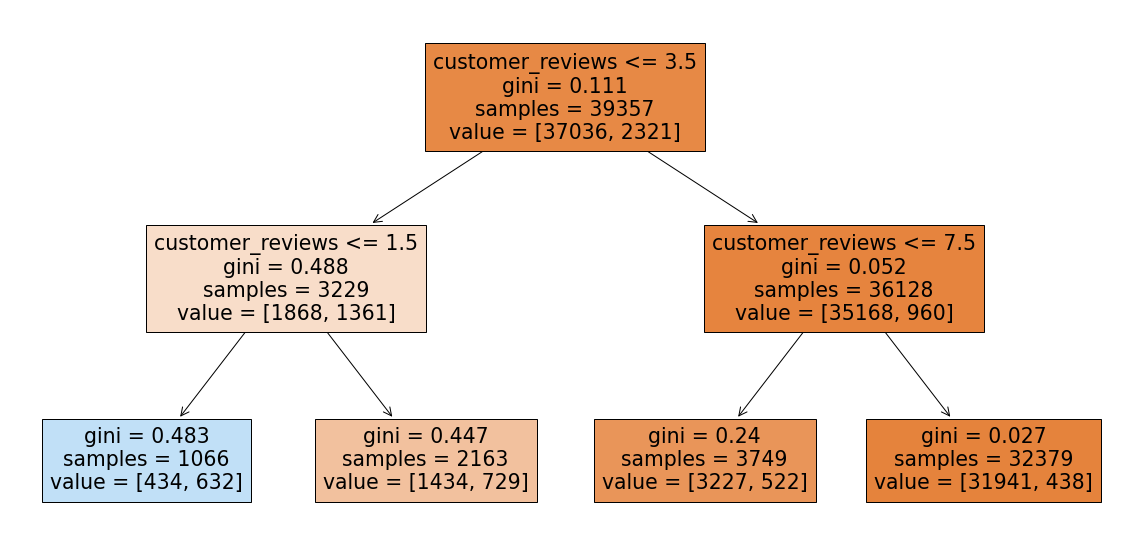

In [40]:
from sklearn import tree
clf = DecisionTreeClassifier(max_depth=2)
clf.fit(X_train, y_train) 
y_proba = clf.predict_proba(X_test)
roc_auc=roc_auc_score(y_test, y_proba[:, 1])

print(f'ROC AUC de Teste é {clf.__class__.__name__} é {roc_auc*100:.2f}%')

plt.figure(figsize=(20,10))
tree.plot_tree(clf,feature_names=X_train.columns,filled=True)

### Any differences on the confusion matrixes?

              precision    recall  f1-score   support

           0       0.96      0.95      0.95      9260
           1       0.30      0.35      0.33       580

    accuracy                           0.91      9840
   macro avg       0.63      0.65      0.64      9840
weighted avg       0.92      0.91      0.92      9840



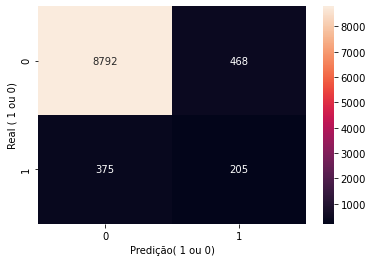

In [41]:
reg = DecisionTreeClassifier()
reg.fit(X_train, y_train)
y_pred=reg.predict(X_test)
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predição( 1 ou 0)')
plt.ylabel('Real ( 1 ou 0)')
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.68      0.80      9260
           1       0.15      0.93      0.26       580

    accuracy                           0.69      9840
   macro avg       0.57      0.80      0.53      9840
weighted avg       0.94      0.69      0.77      9840



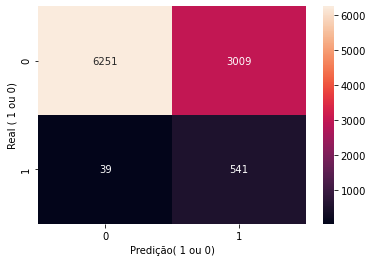

In [42]:
reg = GaussianNB()
reg.fit(X_train, y_train)
y_pred=reg.predict(X_test)
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predição( 1 ou 0)')
plt.ylabel('Real ( 1 ou 0)')
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      9260
           1       0.00      0.00      0.00       580

    accuracy                           0.94      9840
   macro avg       0.47      0.50      0.48      9840
weighted avg       0.89      0.94      0.91      9840



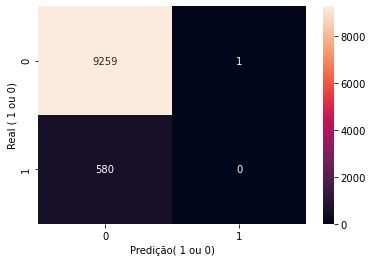

In [43]:
reg = LogisticRegression()
reg.fit(X_train, y_train)
y_pred=reg.predict(X_test)
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predição( 1 ou 0)')
plt.ylabel('Real ( 1 ou 0)')
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      9260
           1       0.53      0.22      0.31       580

    accuracy                           0.94      9840
   macro avg       0.74      0.60      0.64      9840
weighted avg       0.93      0.94      0.93      9840



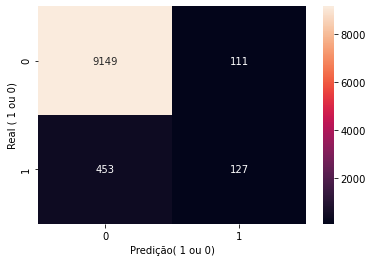

In [44]:
reg = RandomForestClassifier()
reg.fit(X_train, y_train)
y_pred=reg.predict(X_test)
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predição( 1 ou 0)')
plt.ylabel('Real ( 1 ou 0)')
print(classification_report(y_test, y_pred))

In [ ]:
================================================================================================================================

### Analysing the dataframe again
### Lets see if taking the log for the float columns will have an impact

In [45]:
df

,price,pages,size,customer_reviews,stars,abs_topic_1,abs_topic_2,abs_topic_3,abs_topic_4,abs_topic_5,abs_topic_6,abs_topic_7,abs_topic_8,Target,text_to_speech_Enabled,x_ray_Enabled,lending_Enabled
0,9.99,171.0,249.0,23.0,4.9,0.159588,0.062500,-0.070944,-0.003884,0.016212,-0.051104,-0.029460,0.034872,0,1,0,1
1,2.00,258.0,1427.0,80.0,4.7,0.104866,0.050641,-0.050097,0.000461,-0.009988,-0.090850,-0.015816,-0.056624,0,1,1,1
2,9.87,288.0,5643.0,32.0,4.2,0.188824,0.109490,-0.072756,0.025539,0.009796,-0.069543,0.050164,0.108859,0,1,0,0
3,2.99,36.0,98.0,6.0,4.5,0.109612,0.073879,-0.077477,-0.005698,0.038486,-0.035502,-0.028893,0.038010,0,1,0,1
4,5.99,400.0,647.0,59.0,3.6,0.073204,0.026183,-0.017504,0.006818,0.023443,0.012147,0.018851,0.037181,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49192,6.99,256.0,3416.0,14.0,4.3,0.115726,-0.035020,0.017725,-0.001289,-0.016802,-0.010970,0.018145,0.047723,0,1,0,1
49193,9.99,243.0,355.0,8.0,3.8,0.048436,-0.005465,0.001858,0.000574,-0.017573,-0.000969,0.018308,0.003877,0,1,0,1
49194,6.50,70.0,773.0,2.0,4.0,0.108420,0.048563,-0.060650,0.023400,0.024460,-0.021778,-0.022746,0.001170,0,1,0,1
49195,10.49,210.0,3873.0,NaN,NaN,0.046832,0.025334,-0.007727,0.001632,-0.014426,-0.011397,0.016229,0.014027,0,1,0,1


In [46]:
df['price']=np.log(df['price'])
df['pages']=np.log(df['pages'])
df['size']=np.log(df['size'])
df['customer_reviews']=np.log(df['customer_reviews'])
df.head()

,price,pages,size,customer_reviews,stars,abs_topic_1,abs_topic_2,abs_topic_3,abs_topic_4,abs_topic_5,abs_topic_6,abs_topic_7,abs_topic_8,Target,text_to_speech_Enabled,x_ray_Enabled,lending_Enabled
0,2.301585,5.141664,5.517453,3.135494,4.9,0.159588,0.062500,-0.070944,-0.003884,0.016212,-0.051104,-0.029460,0.034872,0,1,0,1
1,0.693147,5.552960,7.263330,4.382027,4.7,0.104866,0.050641,-0.050097,0.000461,-0.009988,-0.090850,-0.015816,-0.056624,0,1,1,1
2,2.289500,5.662960,8.638171,3.465736,4.2,0.188824,0.109490,-0.072756,0.025539,0.009796,-0.069543,0.050164,0.108859,0,1,0,0
3,1.095273,3.583519,4.584967,1.791759,4.5,0.109612,0.073879,-0.077477,-0.005698,0.038486,-0.035502,-0.028893,0.038010,0,1,0,1
4,1.790091,5.991465,6.472346,4.077537,3.6,0.073204,0.026183,-0.017504,0.006818,0.023443,0.012147,0.018851,0.037181,0,1,0,0


### Analysing NaNs and Infs
### Replacing Infs for NaNs to make the training possible

In [47]:
df1 = df.sort_values(by='customer_reviews', ascending=False)
df1

,price,pages,size,customer_reviews,stars,abs_topic_1,abs_topic_2,abs_topic_3,abs_topic_4,abs_topic_5,abs_topic_6,abs_topic_7,abs_topic_8,Target,text_to_speech_Enabled,x_ray_Enabled,lending_Enabled
5558,1.607436,5.958425,6.765039,9.889541,4.6,0.073754,-0.048089,0.036132,-0.002249,0.000417,-0.009407,0.005580,-0.021281,0,1,1,1
739,2.196113,6.073045,7.461066,9.671934,3.8,0.111177,-0.082218,0.052114,0.012358,0.014029,-0.051876,0.005684,0.007490,0,1,1,0
2509,1.943049,5.966147,6.756932,9.532931,4.2,0.086894,-0.010817,0.018848,0.003531,-0.016459,-0.021196,0.033343,0.070389,0,1,1,1
7872,1.785070,5.998937,7.497762,9.487290,4.6,0.095836,-0.024582,0.026282,0.003232,-0.015607,-0.022975,0.040298,0.059110,0,1,1,1
3098,1.827770,5.968708,6.825460,9.487290,4.6,0.033436,-0.016987,0.007218,-0.002122,0.006788,-0.004767,-0.007527,-0.008100,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49176,1.095273,2.944439,5.081404,NaN,NaN,0.116102,0.002495,-0.008241,0.066193,0.039177,-0.016681,-0.011988,0.047536,0,1,0,1
49177,-0.010050,2.639057,4.634729,NaN,NaN,0.068101,0.004310,-0.005286,-0.003536,0.022442,-0.006942,-0.018193,0.047369,0,1,0,0
49186,3.760968,5.874931,8.770750,NaN,NaN,0.162744,0.102335,-0.018587,0.017347,-0.074426,-0.003974,0.048852,0.019908,0,1,0,1
49195,2.350422,5.347108,8.261785,NaN,NaN,0.046832,0.025334,-0.007727,0.001632,-0.014426,-0.011397,0.016229,0.014027,0,1,0,1


In [48]:
df=df.replace([np.inf,-np.inf], np.nan)
df

,price,pages,size,customer_reviews,stars,abs_topic_1,abs_topic_2,abs_topic_3,abs_topic_4,abs_topic_5,abs_topic_6,abs_topic_7,abs_topic_8,Target,text_to_speech_Enabled,x_ray_Enabled,lending_Enabled
0,2.301585,5.141664,5.517453,3.135494,4.9,0.159588,0.062500,-0.070944,-0.003884,0.016212,-0.051104,-0.029460,0.034872,0,1,0,1
1,0.693147,5.552960,7.263330,4.382027,4.7,0.104866,0.050641,-0.050097,0.000461,-0.009988,-0.090850,-0.015816,-0.056624,0,1,1,1
2,2.289500,5.662960,8.638171,3.465736,4.2,0.188824,0.109490,-0.072756,0.025539,0.009796,-0.069543,0.050164,0.108859,0,1,0,0
3,1.095273,3.583519,4.584967,1.791759,4.5,0.109612,0.073879,-0.077477,-0.005698,0.038486,-0.035502,-0.028893,0.038010,0,1,0,1
4,1.790091,5.991465,6.472346,4.077537,3.6,0.073204,0.026183,-0.017504,0.006818,0.023443,0.012147,0.018851,0.037181,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49192,1.944481,5.545177,8.136226,2.639057,4.3,0.115726,-0.035020,0.017725,-0.001289,-0.016802,-0.010970,0.018145,0.047723,0,1,0,1
49193,2.301585,5.493061,5.872118,2.079442,3.8,0.048436,-0.005465,0.001858,0.000574,-0.017573,-0.000969,0.018308,0.003877,0,1,0,1
49194,1.871802,4.248495,6.650279,0.693147,4.0,0.108420,0.048563,-0.060650,0.023400,0.024460,-0.021778,-0.022746,0.001170,0,1,0,1
49195,2.350422,5.347108,8.261785,NaN,NaN,0.046832,0.025334,-0.007727,0.001632,-0.014426,-0.011397,0.016229,0.014027,0,1,0,1


In [49]:
print(len(np.isinf(df)[np.isinf(df)['price']==True]))
print(len(np.isinf(df)[np.isinf(df)['pages']==True]))
print(len(np.isinf(df)[np.isinf(df)['size']==True]))
print(len(np.isinf(df)[np.isinf(df)['customer_reviews']==True]))

0
0
0
0


### New Correlation Matrix

<AxesSubplot:>

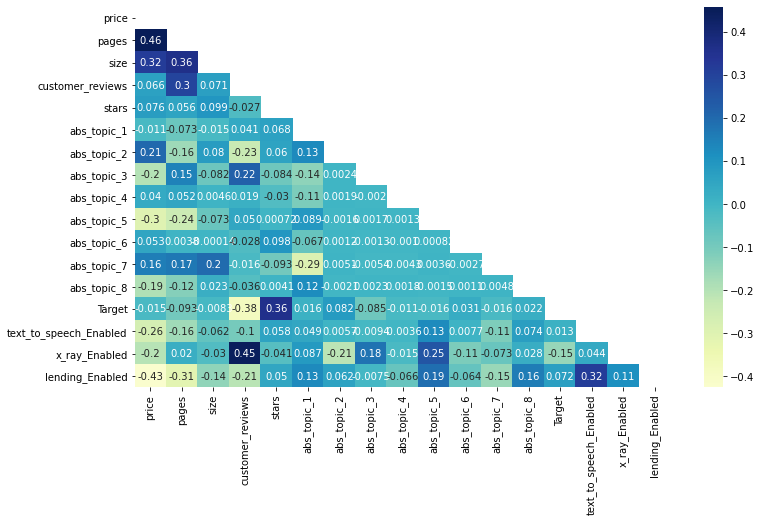

In [50]:
corr=df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(12,7))
sns.heatmap(corr, mask = mask, annot=True, center=0, cmap="YlGnBu")

### Training the data set

In [51]:
train,test = train_test_split(df, test_size=0.2,stratify = df['Target'])
X_cols = ['price', 'pages', 'size', 'customer_reviews', 'text_to_speech_Enabled', 'x_ray_Enabled', 'lending_Enabled','abs_topic_1','abs_topic_2','abs_topic_3','abs_topic_4','abs_topic_5','abs_topic_6','abs_topic_7','abs_topic_8']
X_train, X_test = train[X_cols], test[X_cols]
y_train, y_test = train['Target'], test['Target']
num_cols = ['price', 'pages', 'size', 'customer_reviews','abs_topic_1','abs_topic_2','abs_topic_3','abs_topic_4','abs_topic_5','abs_topic_6','abs_topic_7','abs_topic_8']
train_median = X_train[num_cols].median()
X_train[num_cols]=X_train[num_cols].fillna(train_median)
X_test[num_cols]=X_test[num_cols].fillna(train_median)

### Testing the regression for different models

In [52]:
regs = [RandomForestClassifier(),GaussianNB(),LogisticRegression(),DecisionTreeClassifier()]
for reg in regs:
    print("Regressão: ", reg.__class__.__name__)
    reg = reg
    reg.fit(X_train, y_train)
    print("Score: ", reg.score(X_test, y_test))
    y_proba_test = reg.predict_proba(X_test)
    roc_test = roc_auc_score(y_test, y_proba_test[:, 1])
    print("ROC AUC: ", roc_test)
    print("="*80)

Regressão:  RandomForestClassifier
Score:  0.9435975609756098
ROC AUC:  0.9103489238102331
Regressão:  GaussianNB
Score:  0.8892276422764228
ROC AUC:  0.8952606688016683
Regressão:  LogisticRegression
Score:  0.9449186991869919
ROC AUC:  0.9234317047739629
Regressão:  DecisionTreeClassifier
Score:  0.9152439024390244
ROC AUC:  0.6398190213748417


### Classifying the columns according to their importance for the model

In [53]:
reg = DecisionTreeClassifier()
reg.fit(X_train, y_train)
clf=pd.DataFrame(list(zip(X_train.columns, reg.feature_importances_)), columns=['column', 'relevance'])
clf.sort_values('relevance', ascending=False).head()

,column,relevance
3,customer_reviews,0.277475
2,size,0.077344
13,abs_topic_7,0.076401
14,abs_topic_8,0.071692
7,abs_topic_1,0.068398


In [54]:
reg = RandomForestClassifier()
reg.fit(X_train, y_train)
clf=pd.DataFrame(list(zip(X_train.columns, reg.feature_importances_)), columns=['column', 'relevance'])
clf.sort_values('relevance', ascending=False).head()

,column,relevance
3,customer_reviews,0.262294
14,abs_topic_8,0.067780
8,abs_topic_2,0.067478
1,pages,0.067427
2,size,0.067402


### Decision tree

ROC AUC de Teste é DecisionTreeClassifier é 86.81%


[Text(558.0, 453.0, 'customer_reviews <= 1.242\ngini = 0.111\nsamples = 39357\nvalue = [37036, 2321]'),
 Text(279.0, 271.8, 'customer_reviews <= 0.347\ngini = 0.488\nsamples = 3229\nvalue = [1863, 1366]'),
 Text(139.5, 90.59999999999997, 'gini = 0.482\nsamples = 1068\nvalue = [433, 635]'),
 Text(418.5, 90.59999999999997, 'gini = 0.448\nsamples = 2161\nvalue = [1430, 731]'),
 Text(837.0, 271.8, 'customer_reviews <= 2.138\ngini = 0.051\nsamples = 36128\nvalue = [35173, 955]'),
 Text(697.5, 90.59999999999997, 'gini = 0.224\nsamples = 4578\nvalue = [3991, 587]'),
 Text(976.5, 90.59999999999997, 'gini = 0.023\nsamples = 31550\nvalue = [31182, 368]')]

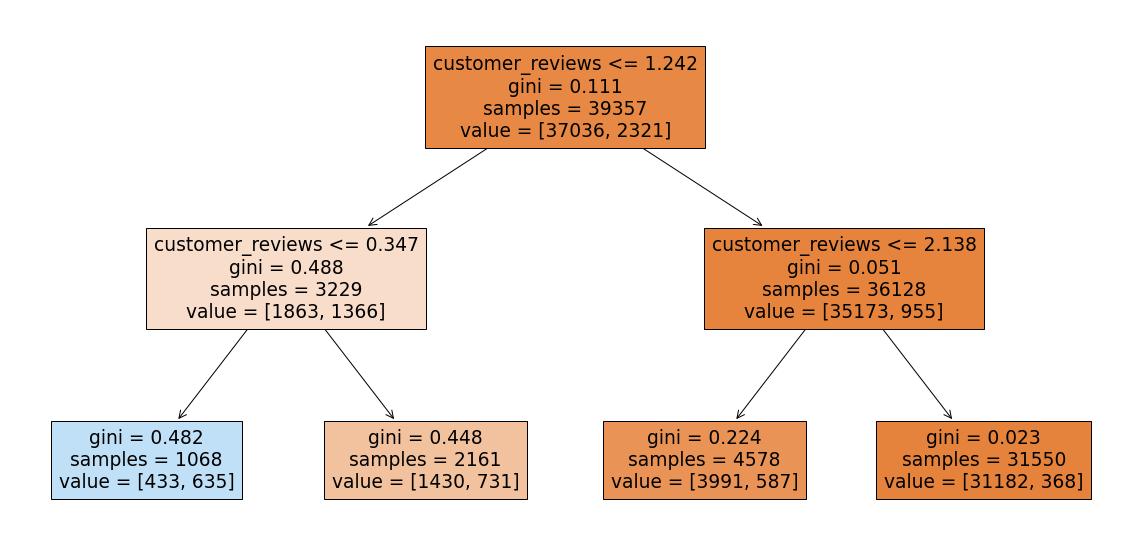

In [55]:
from sklearn import tree
clf = DecisionTreeClassifier(max_depth=2)
clf.fit(X_train, y_train) 
y_proba = clf.predict_proba(X_test)
roc_auc=roc_auc_score(y_test, y_proba[:, 1])

print(f'ROC AUC de Teste é {clf.__class__.__name__} é {roc_auc*100:.2f}%')

plt.figure(figsize=(20,10))
tree.plot_tree(clf,feature_names=X_train.columns,filled=True)

### Confusion Matrixes. Last time I promise

              precision    recall  f1-score   support

           0       0.96      0.95      0.96      9260
           1       0.30      0.32      0.31       580

    accuracy                           0.92      9840
   macro avg       0.63      0.64      0.63      9840
weighted avg       0.92      0.92      0.92      9840



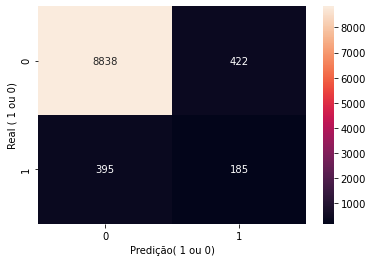

In [56]:
reg = DecisionTreeClassifier()
reg.fit(X_train, y_train)
y_pred=reg.predict(X_test)
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predição( 1 ou 0)')
plt.ylabel('Real ( 1 ou 0)')
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.90      0.94      9260
           1       0.30      0.64      0.41       580

    accuracy                           0.89      9840
   macro avg       0.64      0.77      0.67      9840
weighted avg       0.94      0.89      0.91      9840



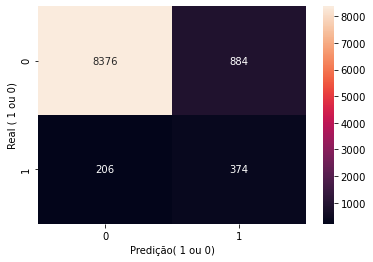

In [57]:
reg = GaussianNB()
reg.fit(X_train, y_train)
y_pred=reg.predict(X_test)
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predição( 1 ou 0)')
plt.ylabel('Real ( 1 ou 0)')
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      9260
           1       0.57      0.28      0.38       580

    accuracy                           0.94      9840
   macro avg       0.76      0.63      0.67      9840
weighted avg       0.93      0.94      0.94      9840



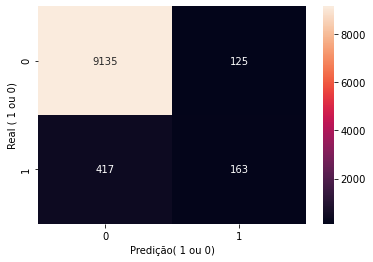

In [58]:
reg = LogisticRegression()
reg.fit(X_train, y_train)
y_pred=reg.predict(X_test)
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predição( 1 ou 0)')
plt.ylabel('Real ( 1 ou 0)')
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      9260
           1       0.54      0.21      0.30       580

    accuracy                           0.94      9840
   macro avg       0.75      0.60      0.64      9840
weighted avg       0.93      0.94      0.93      9840



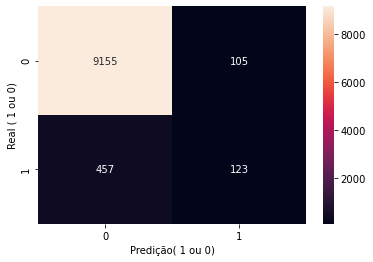

In [59]:
reg = RandomForestClassifier()
reg.fit(X_train, y_train)
y_pred=reg.predict(X_test)
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predição( 1 ou 0)')
plt.ylabel('Real ( 1 ou 0)')
print(classification_report(y_test, y_pred))

In [ ]:
==============================================================